Loading and Visualizing Data ...


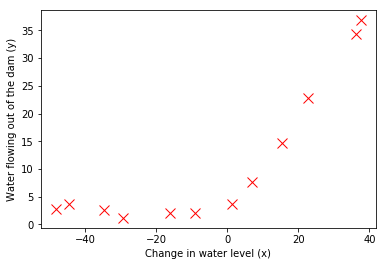

In [59]:
## =========== Part 1: Loading and Visualizing Data =============

from __future__ import print_function

import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# Load Training Data
print('Loading and Visualizing Data ...')

mat = scipy.io.loadmat('ex5data1.mat')

X = mat['X']
y = mat['y']

Xval = mat["Xval"]
yval = mat["yval"]
Xtest = mat["Xtest"]
ytest = mat["ytest"]

# size of the dataset
m = X.shape[0]

# Plot training data
plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show(block=False) 

In [62]:
## =========== Part 2: Regularized Linear Regression Cost =============

def linearRegCostFunction(X, y, theta, lambda_val, return_grad=False):
    m = len(y) 
    
    theta = np.reshape(theta, (-1,y.shape[1]))

    J = 0
    grad = np.zeros(theta.shape)
    
    # cost function
    J = ( 1./(2*m)) * np.power( (np.dot(X, theta) - y) , 2).sum() + ( float(lambda_val) / (2*m)) * np.power(theta[1:theta.shape[0]],2).sum()

    # regularized gradient
    grad = (1./m) * np.dot( X.T, np.dot(X,theta) - y) + ( float(lambda_val) / m )*theta

    # unregularize first gradient
    grad_no_regularization = (1./m) * np.dot( X.T, np.dot(X,theta) - y)
    grad[0] = grad_no_regularization[0]
    
    if return_grad == True:
        return J, grad.flatten()
    elif return_grad == False:
        return J 
    
theta = np.array([[1] , [1]])
X_padded = np.column_stack((np.ones((m,1)), X))
J = linearRegCostFunction(X_padded, y, theta, 1)

In [67]:
## =========== Part 3: Regularized Linear Regression Gradient =============
theta = np.array([[1] , [1]])
J, grad = linearRegCostFunction(X_padded, y, theta, 0, True)

In [69]:
## =========== Part 4: Train Linear Regression =============

from scipy.optimize import minimize

def trainLinearReg(X, y, lambda_val):
   
    # Initialize Theta
    initial_theta = np.zeros((X.shape[1], 1))
    

    # Short hand for cost function to be minimized
    def costFunc(theta):
        return linearRegCostFunction(X, y, theta, lambda_val, True)

    # Now, costFunction is a function that takes in only one argument
    maxiter = 200
    results = minimize(costFunc, x0=initial_theta, options={'disp': True, 'maxiter':maxiter}, method="L-BFGS-B", jac=True)

    theta = results["x"]
    return theta

#  Train linear regression with lambda = 0
lambda_val = 0
theta = trainLinearReg(X_padded, y, lambda_val)

# resets plot 
plt.close()

#  Plot fit over the data
plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X, np.dot(X_padded, theta), '--', linewidth=2)
# plt.show(block=False)

(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)


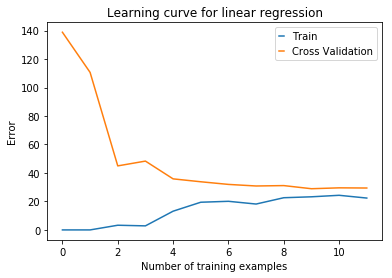

# Training Examples	Train Error	Cross Validation Error

  	1		0.000000	138.846777

  	2		0.000015	110.647622

  	3		3.286615	44.971999

  	4		2.842689	48.338955

  	5		13.154052	35.858531

  	6		19.443965	33.822654

  	7		20.098524	31.965551

  	8		18.172860	30.858614

  	9		22.609407	31.132841

  	10		23.261462	28.935174

  	11		24.317250	29.551049

  	12		22.373907	29.433177



In [55]:
## =========== Part 5: Learning Curve for Linear Regression =============
# Since the model is underfitting the data, we expect to see a graph with "high bias"

def learningCurve(X, y, Xval, yval, lambda_val):
    # Number of training examples
    m = len(X)
    
    # return these values correctly
    error_train = np.zeros((m, 1))
    error_val   = np.zeros((m, 1))
    
    for i in np.arange(1,m+1):
        
        # define training variables for this loop
        X_train = X[:i]
        y_train = y[:i]
        
        theta = trainLinearReg(X_train, y_train, 1)
        
        error_train[i-1] = linearRegCostFunction(X_train, y_train, theta, 0)
        error_val[i-1]   = linearRegCostFunction(Xval   , yval   , theta, 0)
      
    return error_train, error_val

lambda_val = 0
error_train, error_val = learningCurve(np.column_stack((np.ones((m,1)), X)), y, np.column_stack((np.ones((Xval.shape[0], 1)), Xval)), yval, lambda_val)

# resets plot 
plt.close()

p1, p2 = plt.plot(range(m), error_train, range(m), error_val)
plt.title('Learning curve for linear regression')
plt.legend((p1, p2), ('Train', 'Cross Validation'), numpoints=1, handlelength=0.5)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.show(block=False)
plt.axis([0, 13, 0, 150])

print('# Training Examples\tTrain Error\tCross Validation Error\n')
for i in xrange(m):
    print('  \t{:d}\t\t{:f}\t{:f}\n'.format(i+1, float(error_train[i]), float(error_val[i])))


In [56]:
## =========== Part 6: Feature Mapping for Polynomial Regression =============
def polyFeatures(X, p): 
    # initialize X_poly to be equal to the single-column X
    X_poly = X
    
    # if p is equal or greater than 2
    if p >= 2:
        # for each number between column 2 (index 1) and last column
        
        for k in xrange(1,p):
            # add k-th column of polynomial features where k-th column is X.^k
            
            X_poly = np.column_stack((X_poly, np.power(X,k+1)))
            
    return X_poly

def featureNormalize(X):
    
    #   FEATURENORMALIZE(X) returns a normalized version of X where
    #   the mean value of each feature is 0 and the standard deviation
    #   is 1. This is often a good preprocessing step to do when
    #   working with learning algorithms.

    mu = np.mean(X, axis=0)
    X_norm = X - mu

    sigma = np.std(X_norm, axis=0)
    X_norm = X_norm/sigma

    return X_norm, mu, sigma
    
p = 8

# Map X onto Polynomial Features and Normalize ( Training set)
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly)
X_poly = np.column_stack((np.ones((m,1)), X_poly)) # Add Ones

# # Map X_poly_test and normalize (using mu and sigma) ( Testing set )
X_poly_test = polyFeatures(Xtest, p)
X_poly_test = X_poly_test - mu
X_poly_test = X_poly_test / sigma
X_poly_test = np.column_stack((np.ones((X_poly_test.shape[0],1)), X_poly_test)) # Add Ones

# # Map X_poly_val and normalize (using mu and sigma) ( Cross validation set )
X_poly_val = polyFeatures(Xval, p)
X_poly_val = X_poly_val - mu
X_poly_val = X_poly_val / sigma
X_poly_val = np.column_stack((np.ones((X_poly_val.shape[0],1)), X_poly_val)) # Add Ones

print('Normalized Training Example 1:')
print('  {:s}  '.format(X_poly[1, :]))

Normalized Training Example 1:
  [ 1.         -0.8389201   0.0013142  -0.25896174 -0.34156482  0.09754927
 -0.45519664  0.26677343 -0.46887381]  


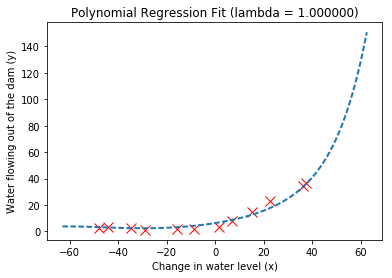

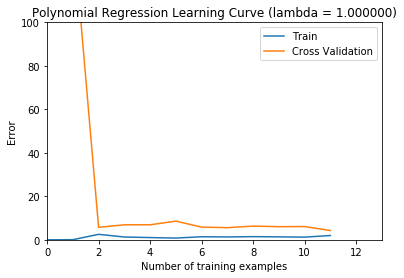

Polynomial Regression (lambda = 1.000000)


# Training Examples	Train Error	Cross Validation Error

  	1		0.000000	138.846731

  	2		0.042839	143.502495

  	3		2.515217	5.749648

  	4		1.285542	6.890110

  	5		1.028307	6.900155

  	6		0.794844	8.581363

  	7		1.409964	5.842339

  	8		1.316231	5.575941

  	9		1.458736	6.300211

  	10		1.353304	6.033562

  	11		1.228546	6.089839

  	12		1.958697	4.263453



In [57]:
## =========== Part 7: Learning Curve for Polynomial Regression =============

lambda_val = 1;
theta = trainLinearReg(X_poly, y, lambda_val)

def plotFit(min_x, max_x, mu, sigma, theta, p):
    #PLOTFIT Plots a learned polynomial regression fit over an existing figure.
    #Also works with linear regression.
    #   PLOTFIT(min_x, max_x, mu, sigma, theta, p) plots the learned polynomial
    #   fit with power p and feature normalization (mu, sigma).

    # We plot a range slightly bigger than the min and max values to get
    # an idea of how the fit will vary outside the range of the data points
    x = np.array(np.arange(min_x - 15, max_x + 25, 0.05)) # 1D vector

    # Map the X values 
    X_poly = polyFeatures(x, p)
    X_poly = X_poly - mu
    X_poly = X_poly/sigma

    # Add ones
    X_poly = np.column_stack((np.ones((x.shape[0],1)), X_poly))

    # Plot
    plt.plot(x, np.dot(X_poly, theta), '--', linewidth=2)


# Plot training data and fit
# resets plot 
plt.close()
plt.figure(1)

plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plotFit(min(X), max(X), mu, sigma, theta, p)
plt.xlabel('Change in water level (x)') 
plt.ylabel('Water flowing out of the dam (y)')
plt.title ('Polynomial Regression Fit (lambda = {:f})'.format(lambda_val))
plt.show(block=False)

plt.figure(2)
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, lambda_val)
p1, p2 = plt.plot(range(m), error_train, range(m), error_val)

plt.title('Polynomial Regression Learning Curve (lambda = {:f})'.format(lambda_val))
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 100])
plt.legend((p1, p2), ('Train', 'Cross Validation'))
plt.show(block=False)

print('Polynomial Regression (lambda = {:f})\n\n'.format(lambda_val))
print('# Training Examples\tTrain Error\tCross Validation Error\n')
for i in xrange(m):
    print('  \t{:d}\t\t{:f}\t{:f}\n'.format(i+1, float(error_train[i]), float(error_val[i])))
